In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ..

/Share/home/shibinbin/projects/Deepfold2


In [3]:
import h5py
import pandas as pd

/opt/conda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [12]:
gtf = pd.read_table('/Share/home/shibinbin/data/gtf/TAIR10/Arabidopsis_thaliana.TAIR10.34.rRNA.gtf', 
                    header=None, sep='\t')
gene_ids = gtf[8].str.extract('transcript_id "([^"]+)";', expand=False)
gtf.head()

,0,1,2,3,4,5,6,7,8
0,3,araport11,gene,14197677,14199484,.,+,.,"gene_id ""AT3G41768""; gene_source ""araport11""; ..."
1,3,araport11,transcript,14197677,14199484,.,+,.,"gene_id ""AT3G41768""; transcript_id ""AT3G41768...."
2,3,araport11,exon,14197677,14199484,.,+,.,"gene_id ""AT3G41768""; transcript_id ""AT3G41768...."
3,3,araport11,gene,14199753,14199916,.,+,.,"gene_id ""AT3G41979""; gene_source ""araport11""; ..."
4,3,araport11,transcript,14199753,14199916,.,+,.,"gene_id ""AT3G41979""; transcript_id ""AT3G41979...."


In [14]:
bed = pd.read_table('/Share/home/shibinbin/data/gtf/TAIR10/Arabidopsis_thaliana.TAIR10.34.bed12', 
                    header=None, sep='\t')
bed.index = bed[3]
bed.head()

,0,1,2,3,4,5,6,7,8,9,10,11
3,,,,,,,,,,,,
AT1G01010.1,Chr1,3630,5899,AT1G01010.1,100,+,3630,3630,0,6,"283,281,120,390,153,461,","0,365,855,1075,1543,1808,"
AT1G01020.2,Chr1,6787,8737,AT1G01020.2,100,-,6787,6787,0,8,"282,294,86,74,46,90,48,167,","0,369,776,974,1154,1448,1629,1783,"
AT1G01020.6,Chr1,6787,8737,AT1G01020.6,100,-,6787,6787,0,6,"282,294,86,90,48,144,","0,369,776,1448,1629,1806,"
AT1G01020.1,Chr1,6787,9130,AT1G01020.1,100,-,6787,6787,0,9,"282,76,67,86,74,46,90,48,560,","0,369,596,776,974,1154,1448,1629,1783,"
AT1G01020.3,Chr1,6787,9130,AT1G01020.3,100,-,6787,6787,0,8,"282,76,67,86,74,46,229,560,","0,369,596,776,974,1154,1448,1783,"


In [5]:
reactivities = {}
with h5py.File('output/DMS-seq/Ding_2014/reactivities', 'r') as f:
    for transcript_id in gene_ids:
        if transcript_id in f.keys():
            reactivities[transcript_id] = f[transcript_id][:]

In [6]:
lengths = {transcript_id:np.sum(~np.isnan(data)) for transcript_id, data in reactivities.items()}
print(lengths)

{'ATCG00950.1': 85, 'ATCG00920.1': 96, 'ATCG01180.1': 123, 'ATMG01380.1': 32, 'ATCG01210.1': 88, 'ATMG01390.1': 1502, 'ATMG00020.1': 1889}


In [7]:
reactivities['ATMG01390.1']

array([0.25201327, 0.30516687, 0.09219323, ...,        nan,        nan,
              nan], dtype=float32)

In [10]:
from bx.bbi.bigwig_file import BigWigFile

In [17]:
bigwig = {}
bigwig['+'] = BigWigFile(open('/Share/home/shibinbin/data/RNAex/count/A.thaliana/TAIR10/Structure-seq/DMS/genome.plus.bw', 'rb'))
bigwig['-'] = BigWigFile(open('/Share/home/shibinbin/data/RNAex/count/A.thaliana/TAIR10/Structure-seq/DMS/genome.minus.bw', 'rb'))

In [29]:
counts = {'+': {}, '-': {}}
for strand in '+-':
    for transcript_id in reactivities:
        tx = bed.loc[transcript_id]
        counts[strand][transcript_id] = bigwig[strand].get_as_array(tx[0], tx[1], tx[2])

In [39]:
bed.loc['ATMG01390.1']

0     mitochondria
1           361349
2           363284
3      ATMG01390.1
4              100
5                -
6           361349
7           361349
8                0
9                1
10           1935,
11              0,
Name: ATMG01390.1, dtype: object

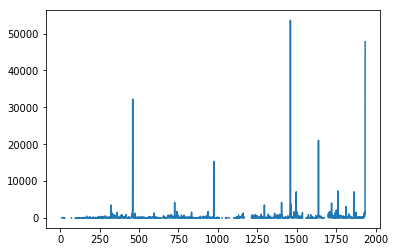

In [35]:
plot(counts['-']['ATMG01390.1'])

In [19]:
bw = bigwig['+']

In [68]:
sequence = np.asarray([chr(i + ord('A')) for i in range(14)], dtype='S1')
print(sequence)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N']


In [61]:
indices = np.tile(np.arange(10, dtype=np.int32), 5).reshape((-1, 10))
indices += np.arange(5)[:, np.newaxis]
indices

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13]], dtype=int32)

In [62]:
np.take(sequence, indices)

array([['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
       ['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'],
       ['C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'],
       ['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M'],
       ['E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N']], dtype='|S1')

In [63]:
import numba

In [85]:
@numba.jit
def split_windows_valid(x, window_size, stride):
    out_length = int(np.floor(float(x.shape[0] - window_size)/stride)) + 1
    if out_length < 0:
        out_length = 0
    windows = np.empty((out_length, window_size), dtype=x.dtype)
    i_x = 0
    for i_w in range(0, out_length):
        for j in range(window_size):
            windows[i_w, j] = x[i_x + j]
        i_x += stride
    return windows

In [93]:
split_windows_valid(sequence, 14, 110)

array([['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
        'N']], dtype='|S1')

In [97]:
int(np.floor(float(100 - 1)/25)) + 1

4

In [104]:
def split_windows_same(x, padded_value, window_size, stride):
    out_length = int(np.floor(float(x.shape[0] - 1)/stride)) + 1
    windows = np.full((out_length, window_size), padded_value, dtype=x.dtype)
    # left and right padding length
    pl = int(np.floor(float(window_size)/2))
    pr = window_size - pl
    L = x.shape[0]
    i_x = 0
    for i_w in range(out_length):
        for j in range(window_size):
            x_pos = i_x + j - pl
            if 0 <= x_pos < L:
                windows[i_w, j] = x[x_pos]
        i_x += stride
    return windows
split_windows_same(sequence, 'N', 11, 1)

array([['N', 'N', 'N', 'N', 'N', 'A', 'B', 'C', 'D', 'E', 'F'],
       ['N', 'N', 'N', 'N', 'A', 'B', 'C', 'D', 'E', 'F', 'G'],
       ['N', 'N', 'N', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
       ['N', 'N', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
       ['N', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
       ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'],
       ['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'],
       ['C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M'],
       ['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N'],
       ['E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'N'],
       ['F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'N', 'N'],
       ['G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'N', 'N', 'N'],
       ['H', 'I', 'J', 'K', 'L', 'M', 'N', 'N', 'N', 'N', 'N'],
       ['I', 'J', 'K', 'L', 'M', 'N', 'N', 'N', 'N', 'N', 'N']],
      dtype='|S1')